<a href="https://colab.research.google.com/github/Raphaeldavid203/University-Projects/blob/main/quantitative_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/ First off, here we import official data through Yahoo Finance's API, including the stocks we want to analyze as well as QQQ and our benchmark, ACWI. We calculate the average annual return over 10 years and the volatility, which is the standard deviation.



In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

tickers = ['ACWI', 'XOM', 'RYAAY', 'SU', 'CSCO', 'EBAY', 'UMC', 'PM', 'TRI', 'ACLS', 'MMT', 'QQQ']

start_date = '2014-03-01'
end_date = '2024-03-01'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

daily_returns = data.pct_change()

# Calculate average annual return
average_annual_return = ((1 + daily_returns.mean()) ** 252) - 1  # Compounded annual return

# Calculate annual volatility
annual_volatility = daily_returns.std() * np.sqrt(252)  # Standard deviation of daily returns scaled to annual

print("Average Annual Return:\n", average_annual_return)
print("\nAnnual Volatility:\n", annual_volatility)


[*********************100%%**********************]  12 of 12 completed


Average Annual Return:
 Ticker
ACLS     0.474149
ACWI     0.102651
CSCO     0.154202
EBAY     0.125370
MMT      0.064299
PM       0.091767
QQQ      0.209964
RYAAY    0.166274
SU       0.115927
TRI      0.223743
UMC      0.280587
XOM      0.094723
dtype: float64

Annual Volatility:
 Ticker
ACLS     0.513436
ACWI     0.169473
CSCO     0.249402
EBAY     0.297115
MMT      0.143496
PM       0.225440
QQQ      0.215269
RYAAY    0.345875
SU       0.378545
TRI      0.198466
UMC      0.370027
XOM      0.276342
dtype: float64


2/ Then, we perform our Monte Carlo simulation. Please note that here, MPort is given from a separately calculated average using the above results. We conducted the simulation for all the stocks but actually only needed MPort, QQ, and ACWI. We could have simulated for all the stocks but chose 10, and it would have been too complicated to calculate and especially to visualise. Given that our portfolio of 10 stocks is evenly weighted, it wasn’t worth it. So, here we simulated our portfolio based on the average returns and volatility.


In [2]:
import numpy as np
import pandas as pd

# Number of trading days per year in our analysis
trading_days = 252

#Data calculated with the API
Yahoo_average_returns = {
    'ACLS': 0.474149,
    'ACWI': 0.102651,
    'CSCO': 0.154202,
    'EBAY': 0.125370,
    'MMT': 0.064299,
    'PM': 0.091768,
    'RYAAY': 0.166274,
    'SU': 0.115927,
    'TRI': 0.223743,
    'UMC': 0.280587,
    'XOM': 0.094723,
    'MPort': 0.179104, #calculated separately, it's just the average of our 10 picks
    'QQQ': 0.047437,
}

#Data calculated with the API
Yahoo_volatilities = {
    'ACLS': 0.513436,
    'ACWI': 0.169473,
    'CSCO': 0.249402,
    'EBAY': 0.297115,
    'MMT': 0.143496,
    'PM': 0.225441,
    'RYAAY': 0.345875,
    'SU': 0.378545,
    'TRI': 0.198466,
    'UMC': 0.370027,
    'XOM': 0.276342,
    'MPort': 0.317724, #calculated separately, it's just the average of our 10 picks
    'QQQ': 0.160107,
}

# Monte Carlo Simulation
np.random.seed(42)  # For reproducible results
n_simulations = 10000  # Number of simulations to run
payoffs = pd.DataFrame()

# Simulate daily returns and calculate annual payoffs
for stock, average_return in Yahoo_average_returns.items():
    volatility = Yahoo_volatilities[stock]
    simulated_returns = np.random.normal(average_return / trading_days,
                                          volatility / np.sqrt(trading_days),
                                          (n_simulations, trading_days))
    final_value = (1 + simulated_returns).prod(axis=1)
    payoffs[stock] = final_value - 1

print(payoffs.describe())

               ACLS          ACWI          CSCO          EBAY           MMT  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.595214      0.108341      0.167226      0.132711      0.064665   
std        0.867114      0.187154      0.295733      0.342959      0.153468   
min       -0.806112     -0.399066     -0.673063     -0.633428     -0.356257   
25%        0.002147     -0.022395     -0.044940     -0.108696     -0.044371   
50%        0.403264      0.092426      0.136024      0.080730      0.055230   
75%        0.964279      0.221592      0.335011      0.319277      0.160758   
max       14.183748      1.154065      2.342422      2.327340      0.861664   

                 PM         RYAAY            SU           TRI           UMC  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.099111      0.185374      0.122822      0.248575      0.317713   
std        0.251499      0.420429      0.437286    

3/ Next, we compiled the important information.

In [4]:
stats_ACWI = payoffs['ACWI'].describe()
print("Statistics for ACWI:")
print(stats_ACWI)
print("\n")

stats_QQQ = payoffs['QQQ'].describe()
print("Statistics for QQQ:")
print(stats_QQQ)
print("\n")

stats_MPort = payoffs['MPort'].describe()
print("Statistics for MPort (Portfolio):")
print(stats_MPort)
print("\n")

Statistics for ACWI:
count    10000.000000
mean         0.108341
std          0.187154
min         -0.399066
25%         -0.022395
50%          0.092426
75%          0.221592
max          1.154065
Name: ACWI, dtype: float64


Statistics for QQQ:
count    10000.000000
mean         0.046681
std          0.167891
min         -0.459343
25%         -0.070057
50%          0.032540
75%          0.149718
max          1.065950
Name: QQQ, dtype: float64


Statistics for MPort (Portfolio):
count    10000.000000
mean         0.199636
std          0.389091
min         -0.656398
25%         -0.080956
50%          0.143015
75%          0.416415
max          2.568151
Name: MPort, dtype: float64




4/ Then, we detailed the Monte Carlo simulation as much as possible by offering different decompositions, which was useful for providing the graphical representation in the following part.





In [6]:
import pandas as pd
import numpy as np


percentiles_list = [i/100 for i in range(1, 100)]

# Statistics for ACWI
stats_ACWI = payoffs['ACWI'].describe(percentiles=percentiles_list)
print("Statistics for ACWI with Percentiles from 1% to 99%:")
print(stats_ACWI)
print("\n")

# Statistics for MPort
stats_MPort = payoffs['MPort'].describe(percentiles=percentiles_list)
print("Statistics for MPort (Portfolio) with Percentiles from 1% to 99%:")
print(stats_MPort)
print("\n")

# Statistics for BNP
stats_QQQ = payoffs['QQQ'].describe(percentiles=percentiles_list)
print("Statistics for QQQ with Percentiles from 1% to 99%:")
print(stats_QQQ)
print("\n")


Statistics for ACWI with Percentiles from 1% to 99%:
count    10000.000000
mean         0.108341
std          0.187154
min         -0.399066
1%          -0.263029
             ...     
96%          0.475057
97%          0.505089
98%          0.547895
99%          0.617760
max          1.154065
Name: ACWI, Length: 104, dtype: float64


Statistics for MPort (Portfolio) with Percentiles from 1% to 99%:
count    10000.000000
mean         0.199636
std          0.389091
min         -0.656398
1%          -0.456832
             ...     
96%          0.992319
97%          1.062678
98%          1.177644
99%          1.380633
max          2.568151
Name: MPort, Length: 104, dtype: float64


Statistics for QQQ with Percentiles from 1% to 99%:
count    10000.000000
mean         0.046681
std          0.167891
min         -0.459343
1%          -0.290737
             ...     
96%          0.369629
97%          0.398180
98%          0.436819
99%          0.491179
max          1.065950
Name: QQQ, Length:

5/ Indeed, here we visualise our histogram to see the frequency of returns. We separated it into deciles but could have used other distributions. We didn’t directly use them in our report, but these representations were very helpful for its elaboration.

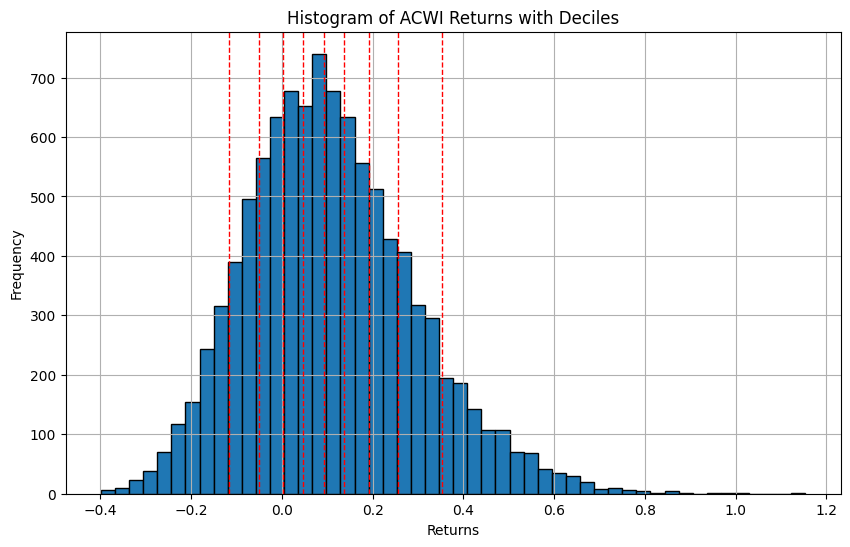

Decile 1: -0.11765151402429196
Decile 2: -0.049424819847047385
Decile 3: 0.0020699451433774368
Decile 4: 0.04743920376121396
Decile 5: 0.09242582044705305
Decile 6: 0.13780647337655472
Decile 7: 0.19132426656015245
Decile 8: 0.2567403007474688
Decile 9: 0.3529060793629938


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

acwi_data = payoffs['ACWI']

deciles = np.percentile(acwi_data, [10, 20, 30, 40, 50, 60, 70, 80, 90])

plt.figure(figsize=(10, 6))
plt.hist(acwi_data, bins=50, alpha=1, edgecolor='black')

for decile in deciles:
    plt.axvline(x=decile, color='red', linestyle='dashed', linewidth=1)

plt.title('Histogram of ACWI Returns with Deciles')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import numpy as np

acwi_data = payoffs['ACWI']

deciles = np.percentile(acwi_data, np.arange(10, 100, 10))

for i, decile in enumerate(deciles, 1):
    print(f"Decile {i}: {decile}")

We do the same as for the ACWI but this time for MPort, our 10 stocks.





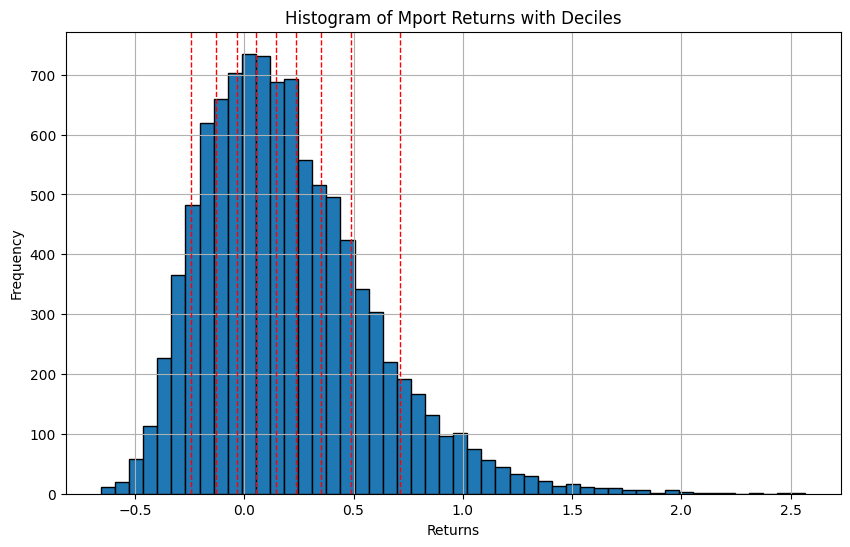

Decile 1: -0.24221129387068532
Decile 2: -0.1292200000216042
Decile 3: -0.03511071451322695
Decile 4: 0.05333051544997696
Decile 5: 0.14301470494744783
Decile 6: 0.23484107654749561
Decile 7: 0.3501479688491674
Decile 8: 0.4890494552614071
Decile 9: 0.7108485830646794


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

MPort_data = payoffs['MPort']

deciles = np.percentile(MPort_data, [10, 20, 30, 40, 50, 60, 70, 80, 90])

plt.figure(figsize=(10, 6))
plt.hist(MPort_data, bins=50, alpha=1, edgecolor='black')

for decile in deciles:
    plt.axvline(x=decile, color='red', linestyle='dashed', linewidth=1)

plt.title('Histogram of Mport Returns with Deciles')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import numpy as np

MPort_data = payoffs['MPort']

deciles = np.percentile(MPort_data, np.arange(10, 100, 10))

for i, decile in enumerate(deciles, 1):
    print(f"Decile {i}: {decile}")

Then we do the same for QQQ, which is useful for clearly visualizing the distribution. Adding the red lines and representing the deciles helps to visualize the differences between the assets well.



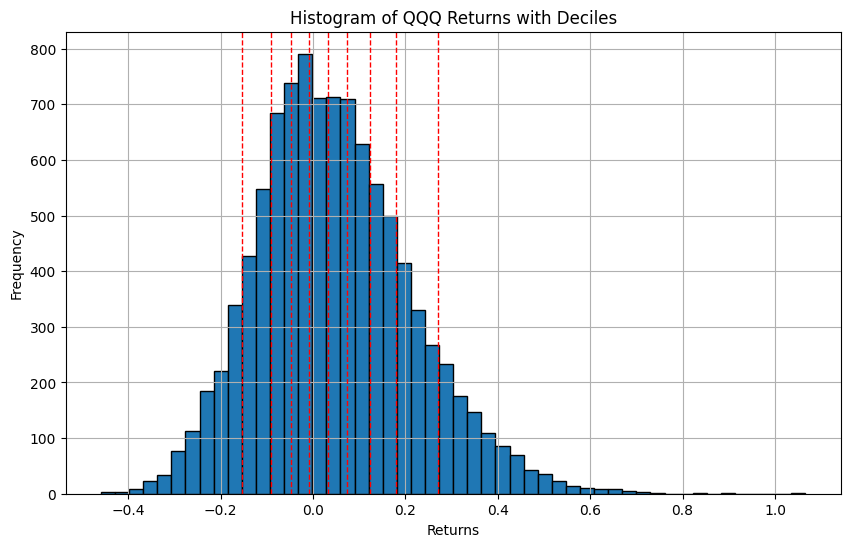

Decile 1: -0.1545945883672169
Decile 2: -0.09211655534751324
Decile 3: -0.04834848197484607
Decile 4: -0.009422930295421445
Decile 5: 0.03254034534372641
Decile 6: 0.07426074912021197
Decile 7: 0.1222921884803304
Decile 8: 0.1799373569695804
Decile 9: 0.26989251101220096


In [7]:
import matplotlib.pyplot as plt
import numpy as np

acwi_data = payoffs['QQQ']

deciles = np.percentile(acwi_data, [10, 20, 30, 40, 50, 60, 70, 80, 90])

plt.figure(figsize=(10, 6))
plt.hist(acwi_data, bins=50, alpha=1, edgecolor='black')

for decile in deciles:
    plt.axvline(x=decile, color='red', linestyle='dashed', linewidth=1)

plt.title('Histogram of QQQ Returns with Deciles')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import numpy as np

acwi_data = payoffs['QQQ']

deciles = np.percentile(acwi_data, np.arange(10, 100, 10))

for i, decile in enumerate(deciles, 1):
    print(f"Decile {i}: {decile}")

Finally, here we group the three histograms to compare the assets well, and this chart was used in our report.


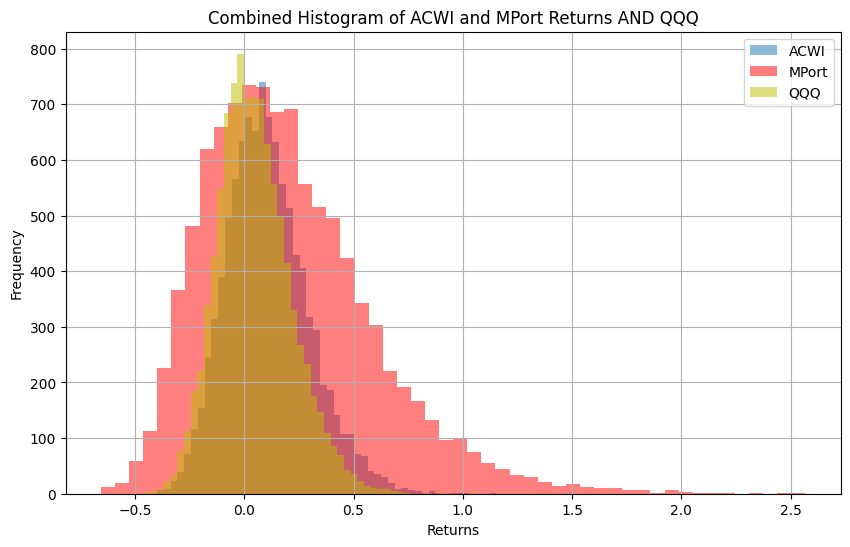

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

acwi_data = payoffs['ACWI']
mport_data = payoffs['MPort']
BNP_data = payoffs['QQQ']

plt.figure(figsize=(10, 6))
plt.hist(acwi_data, bins=50, alpha=0.5, label='ACWI')
plt.hist(mport_data, bins=50, alpha=0.5, label='MPort', color='r')
plt.hist(BNP_data, bins=50, alpha=0.5, label='QQQ', color='y')
plt.title('Combined Histogram of ACWI and MPort Returns AND QQQ')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

6/ Lastly, here we represented our Monte Carlo simulation for QQQ and MPort, taking the top 75% and bottom 75%. Of course, we could take other deciles or distributions.

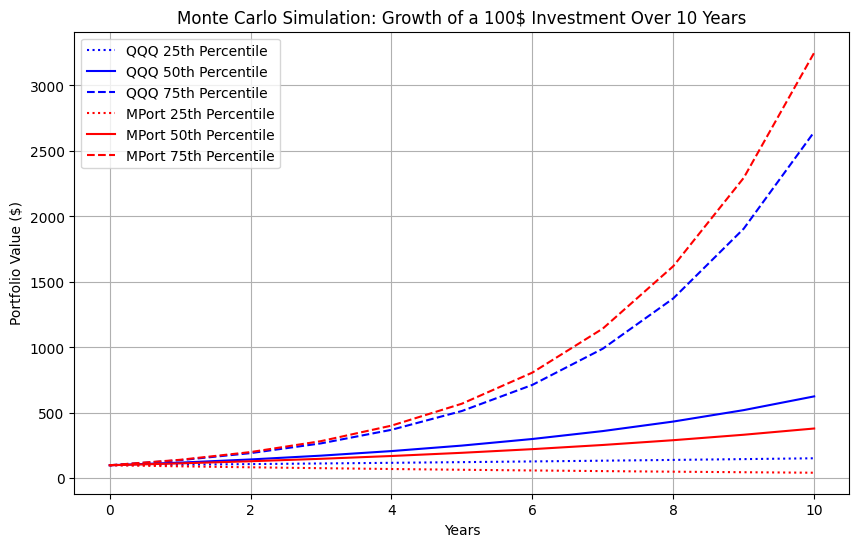

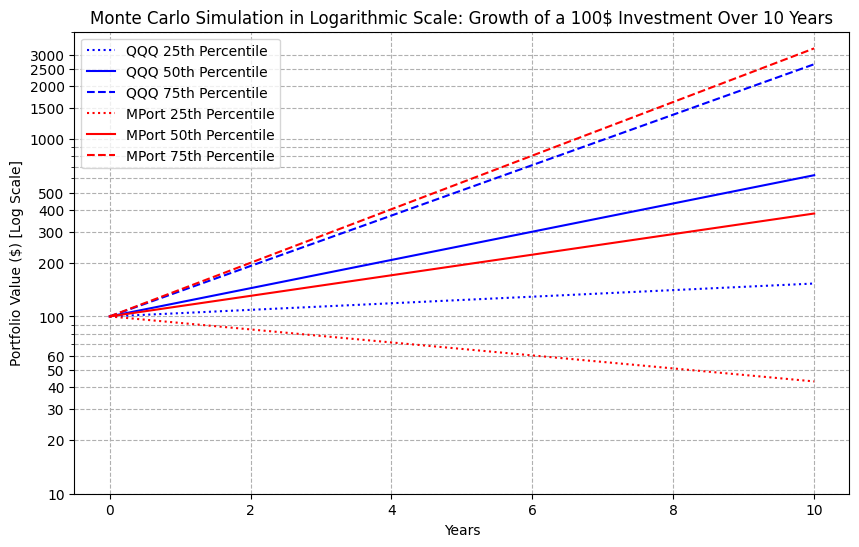

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Provided data for ACWI, QQQ, MPort for the 25th, 50th, and 75th percentiles
percentiles_qqq = [0.043666, 0.201301, 0.387547]
percentiles_mport = [-0.080956, 0.143015, 0.416415]

# Simulation period set for 10 years
years = np.arange(0, 11, 1)

# Monte Carlo simulation function for initial investment over 10 years
def simulate_growth(initial_investment, percentile, years):
    """
    Calculates the growth of the initial investment for given percentiles over the period of years.

    :param initial_investment: The initial investment
    :param percentile: The return percentile (25%, 50%, 75%)
    :param years: The duration of the period in years
    :return: An array with the investment value for each year
    """
    return np.array([initial_investment * ((1 + percentile) ** year) for year in years])


growth_qqq_25 = simulate_growth(100, percentiles_qqq[0], years)
growth_qqq_50 = simulate_growth(100, percentiles_qqq[1], years)
growth_qqq_75 = simulate_growth(100, percentiles_qqq[2], years)

growth_mport_25 = simulate_growth(100, percentiles_mport[0], years)
growth_mport_50 = simulate_growth(100, percentiles_mport[1], years)
growth_mport_75 = simulate_growth(100, percentiles_mport[2], years)

plt.figure(figsize=(10, 6))

plt.plot(years, growth_qqq_25, label='QQQ 25th Percentile', color='blue', linestyle='dotted')
plt.plot(years, growth_qqq_50, label='QQQ 50th Percentile', color='blue', linestyle='solid')
plt.plot(years, growth_qqq_75, label='QQQ 75th Percentile', color='blue', linestyle='dashed')

plt.plot(years, growth_mport_25, label='MPort 25th Percentile', color='red', linestyle='dotted')
plt.plot(years, growth_mport_50, label='MPort 50th Percentile', color='red', linestyle='solid')
plt.plot(years, growth_mport_75, label='MPort 75th Percentile', color='red', linestyle='dashed')

plt.title('Monte Carlo Simulation: Growth of a 100$ Investment Over 10 Years')
plt.xlabel('Years')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Function to format the y-axis labels as standard numbers
def to_standard_format(x, pos):
    return '{:0.0f}'.format(x)


# Creating the chart in logarithmic scale for easier representation
plt.figure(figsize=(10, 6))
formatter = FuncFormatter(to_standard_format)

plt.semilogy(years, growth_qqq_25, label='QQQ 25th Percentile', color='blue', linestyle='dotted')
plt.semilogy(years, growth_qqq_50, label='QQQ 50th Percentile', color='blue', linestyle='solid')
plt.semilogy(years, growth_qqq_75, label='QQQ 75th Percentile', color='blue', linestyle='dashed')

plt.semilogy(years, growth_mport_25, label='MPort 25th Percentile', color='red', linestyle='dotted')
plt.semilogy(years, growth_mport_50, label='MPort 50th Percentile', color='red', linestyle='solid')
plt.semilogy(years, growth_mport_75, label='MPort 75th Percentile', color='red', linestyle='dashed')

plt.gca().yaxis.set_major_formatter(formatter) # here we can easily modify the values of the ordinate axis.
plt.gca().set_yticks([10, 20, 30, 40, 50, 60, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000])


plt.title('Monte Carlo Simulation in Logarithmic Scale: Growth of a 100$ Investment Over 10 Years')
plt.xlabel('Years')
plt.ylabel('Portfolio Value ($) [Log Scale]')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

7/ To conclude, our program allows an overview of the selected assets in the Monte Carlo simulation. Moving forward, we could create a script to automate our Bayesian game provided in our report to automate the game and analyze several stocks and indices according to many deciles or quartiles, and automate our analyses subsequently. The project is scalable, and I sincerely plan to use it in the future to automate and improve it by adding other functionalities.